In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score
from sklearn.cross_validation import KFold
import numpy as np
from numpy import loadtxt

def load_data(input_file, delim=","):
    data = np.loadtxt(input_file, delimiter=delim)
    print data.shape
    print data.shape[0]
    n_features = data.shape[1]-1
    print n_features
    if n_features == 1:
        X = data[:,0]
    else:
        X = data[:,np.arange(n_features)]
    y = data[:,n_features]
    assert len(X) == len(y)
    print("Number of training examples: %i" % X.shape[0])
    print("Number of features: %s" % X.shape[1])

    return X, y

def svm_sgd_optimize(X, y):    
    n_examples = X.shape[0]
    for train_index, test_index in KFold(n=n_examples, n_folds=5, shuffle=True):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = SGDClassifier()
        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        precision = precision_score(y_test, y_pred, average='micro')
        print("Precision (micro): %.4f" % precision)

print('Loading datasets...')
X, y = load_data("output-1.csv")
print("Training data: (%i,%i)" % (X.shape[0], X.shape[1]))

print('\nTraining Classifier...')
svm_sgd_optimize(X, y)

Loading datasets...
(12, 456)
12
455
Number of training examples: 12
Number of features: 455
Training data: (12,455)

Training Classifier...
Precision (micro): 0.0000
Precision (micro): 0.0000
Precision (micro): 0.0000
Precision (micro): 0.0000
Precision (micro): 0.0000


/home/nishita/env/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/home/nishita/env/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/home/nishita/env/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive 

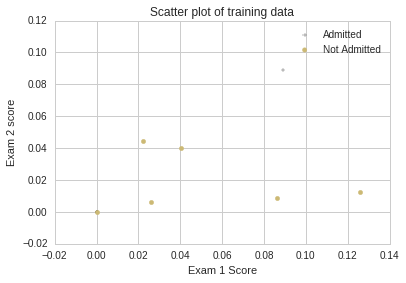

In [13]:
import matplotlib.pyplot as plt
plt.title('Scatter plot of training data')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 score')

x_pos = np.where(y == 1)
x_neg = np.where(y == 0)

adm = plt.scatter(X[x_pos][:,0], X[x_pos][:,1], marker='+', color='k')
not_adm = plt.scatter(X[x_neg][:,0], X[x_neg][:,1], marker='o', color='y')
plt.legend((adm, not_adm), ('Admitted', 'Not Admitted'), scatterpoints=1, loc="upper right")
# plt.xlim(30, 100)
# plt.ylim(30, 100)
plt.show()

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib
